In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-02-09 11:35:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.134.207, 173.194.211.207, 173.194.212.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.134.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   221MB/s    in 0.5s    

2024-02-09 11:35:35 (221 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [6]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)}, images in '{dirpath}'.")

There are 2 directories and 0, images in 'pizza_steak'.
There are 2 directories and 0, images in 'pizza_steak/train'.
There are 0 directories and 750, images in 'pizza_steak/train/pizza'.
There are 0 directories and 750, images in 'pizza_steak/train/steak'.
There are 2 directories and 0, images in 'pizza_steak/test'.
There are 0 directories and 250, images in 'pizza_steak/test/pizza'.
There are 0 directories and 250, images in 'pizza_steak/test/steak'.


In [7]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Feb  9 11:35 .
drwxr-xr-x 1 root root 4096 Feb  9 11:35 ..
drwxr-xr-x 4 root root 4096 Feb  9 11:35 test
drwxr-xr-x 4 root root 4096 Feb  9 11:35 train


In [8]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [9]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

['4176.jpg']
Image shape: (384, 512, 3)


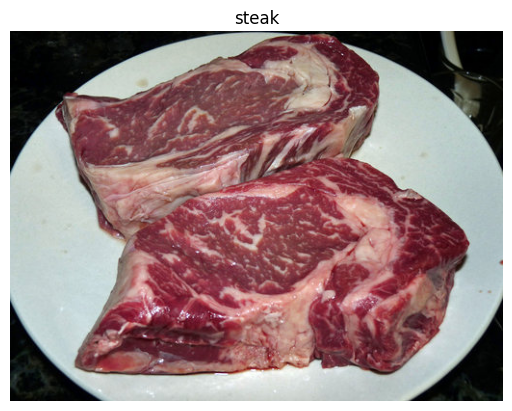

In [11]:
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class="steak")

In [12]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 9, 11, 10],
        [ 5,  7,  6],
        [ 3,  5,  4],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[ 5,  7,  6],
        [ 3,  5,  4],
        [ 2,  4,  3],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[ 5,  7,  6],
        [ 4,  6,  5],
        [ 5,  7,  6],
        ...,
        [ 1,  1,  1],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       ...,

       [[ 1,  3,  2],
        [ 1,  3,  2],
        [ 1,  3,  2],
        ...,
        [17, 28, 24],
        [14, 25, 21],
        [13, 24, 20]],

       [[ 2,  4,  3],
        [ 1,  3,  2],
        [ 1,  3,  2],
        ...,
        [17, 26, 25],
        [14, 22, 24],
        [13, 21, 23]],

       [[ 2,  4,  1],
        [ 1,  3,  2],
        [ 0,  2,  1],
        ...,
        [18, 23, 26],
        [15, 20, 24],
        [14, 19, 23]]], dtype=uint8)>

In [13]:
img.shape

(384, 512, 3)

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 109s 2s/step - loss: 0.5749 - accuracy: 0.6980
Epoch 2/5
47/47 [==============================] - 92s 2s/step - loss: 0.4512 - accuracy: 0.7927
Epoch 3/5
47/47 [==============================] - 92s 2s/step - loss: 0.3978 - accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 91s 2s/step - loss: 0.3633 - accuracy: 0.8493
Epoch 5/5
47/47 [==============================] - 92s 2s/step - loss: 0.3524 - accuracy: 0.8427


In [15]:
tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 175ms/step - loss: 1.5029 - accuracy: 0.5200 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 140ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 163ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 168ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 22s 443ms/step - loss: 3.6712 - accuracy: 0.6593 - val_loss: 0.5534 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 22s 461ms/step - loss: 1.2778 - accuracy: 0.6733 - val_loss: 1.8163 - val_accuracy: 0.5940
Epoch 3/5
47/47 [==============================] - 21s 447ms/step - loss: 0.6553 - accuracy: 0.7493 - val_loss: 0.7390 - val_accuracy: 0.6700
Epoch 4/5
47/47 [==============================] - 20s 423ms/step - loss: 0.5988 - accuracy: 0.7347 - val_loss: 0.6634 - val_accuracy: 0.7280
Epoch 5/5
47/47 [==============================] - 22s 465ms/step - loss: 0.4657 - accuracy: 0.7953 - val_loss: 0.4270 - val_accuracy: 0.7980


In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


['1971757.jpg']
Image shape: (512, 512, 3)
['3749515.jpg']
Image shape: (512, 512, 3)


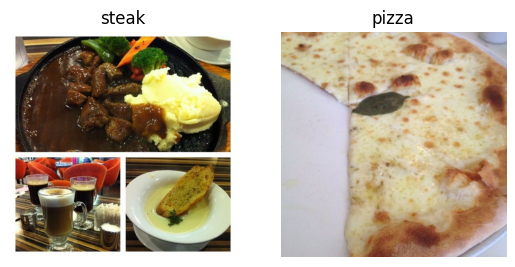

In [20]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [21]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [22]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [26]:
len(train_data)

47

In [27]:
images[:2], images[0].shape

(array([[[[0.1137255 , 0.11764707, 0.18823531],
          [0.1137255 , 0.11764707, 0.18823531],
          [0.10980393, 0.1137255 , 0.18431373],
          ...,
          [0.9607844 , 0.9450981 , 0.9490197 ],
          [0.8313726 , 0.81568635, 0.8196079 ],
          [0.9843138 , 0.9686275 , 0.9725491 ]],
 
         [[0.12156864, 0.1254902 , 0.19607845],
          [0.1254902 , 0.12941177, 0.20000002],
          [0.10196079, 0.10588236, 0.1764706 ],
          ...,
          [0.9333334 , 0.92549026, 0.9294118 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [0.9960785 , 0.98823535, 0.9921569 ]],
 
         [[0.09803922, 0.10196079, 0.17254902],
          [0.10588236, 0.10980393, 0.18039216],
          [0.1254902 , 0.13333334, 0.19215688],
          ...,
          [0.8000001 , 0.79215693, 0.7960785 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [1.        , 0.9960785 , 1.        ]],
 
         ...,
 
         [[0.09803922, 0.07843138, 0.09411766],
          [0.07843

In [28]:
labels

array([0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.],
      dtype=float32)

In [29]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [30]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [31]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [32]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
len(train_data), len(test_data)

(47, 16)

In [34]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 119s 3s/step - loss: 0.8467 - accuracy: 0.6327 - val_loss: 0.4736 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 117s 2s/step - loss: 0.4493 - accuracy: 0.8033 - val_loss: 0.3926 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 124s 3s/step - loss: 0.3513 - accuracy: 0.8573 - val_loss: 0.4214 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 125s 3s/step - loss: 0.1792 - accuracy: 0.9427 - val_loss: 0.4031 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 125s 3s/step - loss: 0.0663 - accuracy: 0.9867 - val_loss: 0.4758 - val_accuracy: 0.8040


<Axes: >

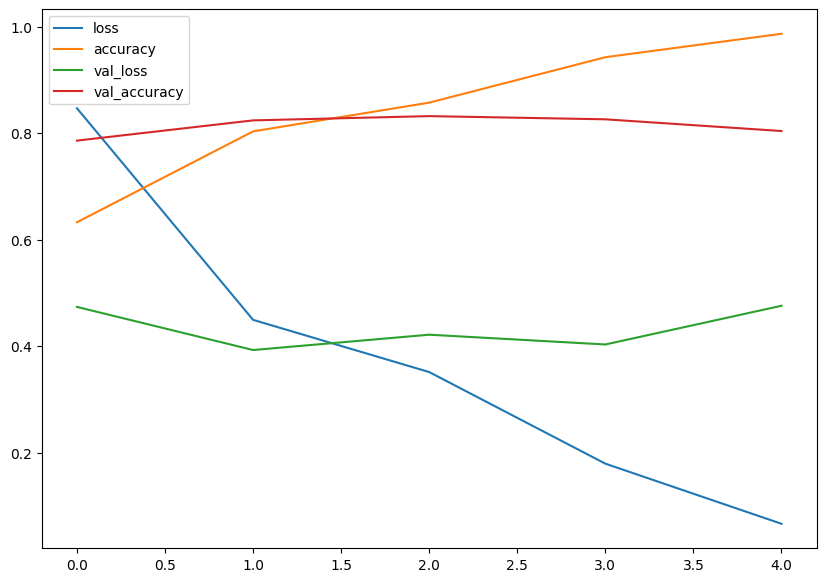

In [35]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [36]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

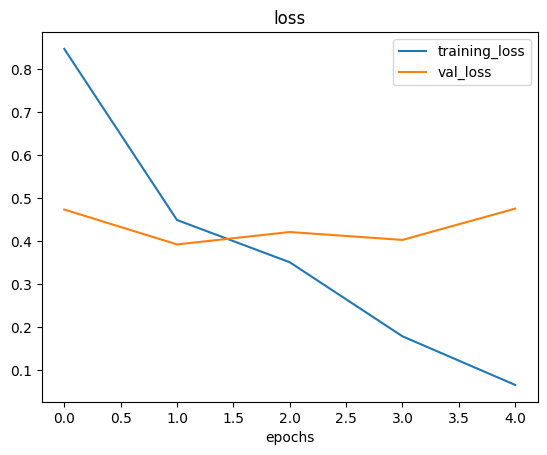

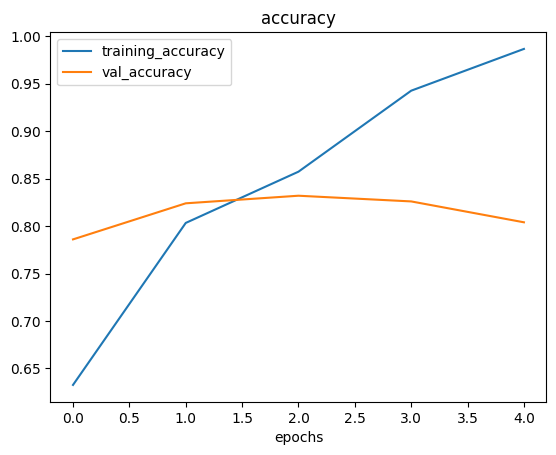

In [37]:
plot_loss_curves(history_4)

In [38]:
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [39]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

In [40]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [41]:
history_5 = model_5.fit(train_data,
              epochs=5,
              steps_per_epoch=len(train_data),
              validation_data=test_data,
              validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 52s 1s/step - loss: 0.6019 - accuracy: 0.6813 - val_loss: 0.4489 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 51s 1s/step - loss: 0.4653 - accuracy: 0.7927 - val_loss: 0.4097 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 54s 1s/step - loss: 0.4333 - accuracy: 0.8020 - val_loss: 0.4179 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 54s 1s/step - loss: 0.4322 - accuracy: 0.8140 - val_loss: 0.4176 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 53s 1s/step - loss: 0.3907 - accuracy: 0.8353 - val_loss: 0.3523 - val_accuracy: 0.8540


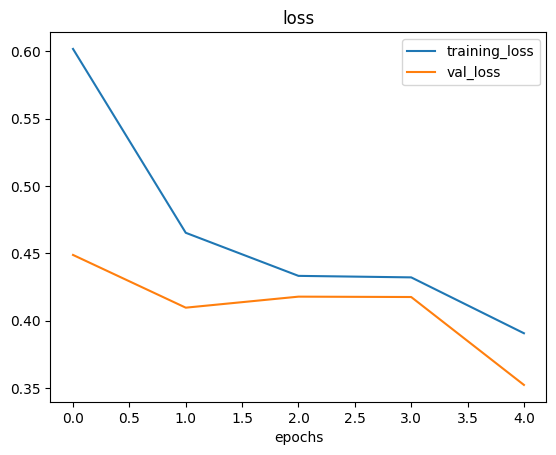

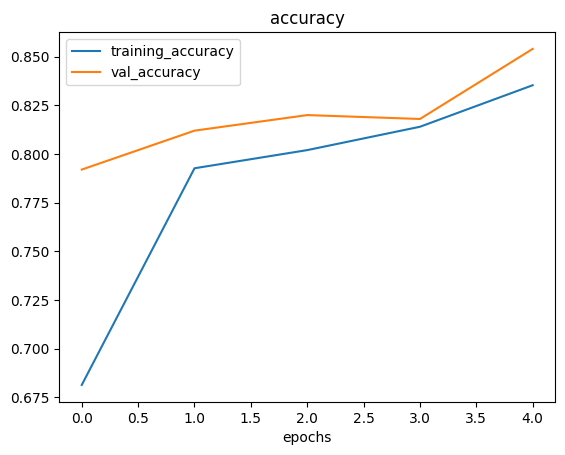

In [42]:
plot_loss_curves(history_5)

In [46]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)



In [48]:
print("Augmented training data: ")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                target_size=(224, 224),
                                                                batch_size=32,
                                                                class_mode="binary",
                                                                shuffle=False)


print("Non-augmented training data: ")
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)

IMG_SIZE =(224, 224)
print("Non-augmented test data: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented test data: 
Found 500 images belonging to 2 classes.


In [49]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 15


(-0.5, 223.5, 223.5, -0.5)

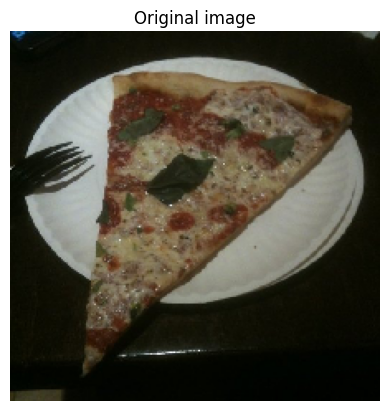

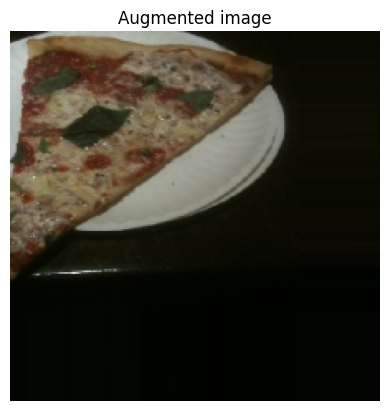

In [51]:
import random
random_number = random.randint(0, 32)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [52]:
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"]
                )

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 69s 1s/step - loss: 0.7436 - accuracy: 0.4593 - val_loss: 0.6788 - val_accuracy: 0.5280
Epoch 2/5
47/47 [==============================] - 72s 2s/step - loss: 0.7002 - accuracy: 0.4440 - val_loss: 0.6907 - val_accuracy: 0.5340
Epoch 3/5
47/47 [==============================] - 70s 1s/step - loss: 0.6895 - accuracy: 0.4813 - val_loss: 0.6717 - val_accuracy: 0.5420
Epoch 4/5
47/47 [==============================] - 66s 1s/step - loss: 0.6741 - accuracy: 0.5227 - val_loss: 0.6810 - val_accuracy: 0.6480
Epoch 5/5
47/47 [==============================] - 70s 1s/step - loss: 0.6844 - accuracy: 0.5880 - val_loss: 0.6442 - val_accuracy: 0.5780


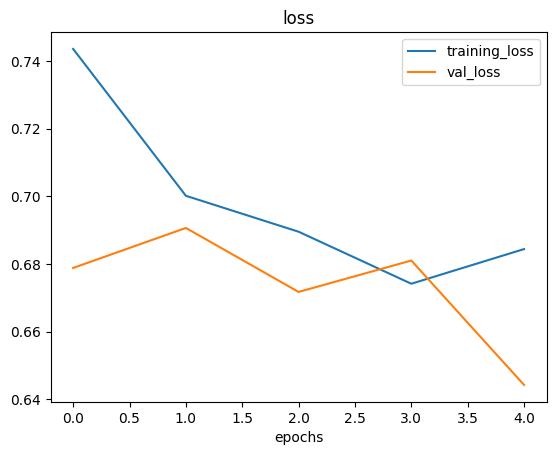

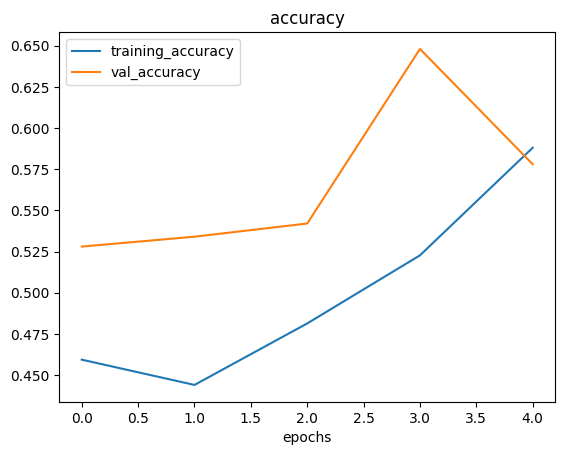

In [53]:
plot_loss_curves(history_6)

In [57]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode="binary",
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [58]:
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 73s 2s/step - loss: 0.6830 - accuracy: 0.5433 - val_loss: 0.6113 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 70s 1s/step - loss: 0.5629 - accuracy: 0.7233 - val_loss: 0.4059 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 71s 2s/step - loss: 0.5147 - accuracy: 0.7600 - val_loss: 0.3958 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 73s 2s/step - loss: 0.4952 - accuracy: 0.7700 - val_loss: 0.4039 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 74s 2s/step - loss: 0.5111 - accuracy: 0.7580 - val_loss: 0.3639 - val_accuracy: 0.8580


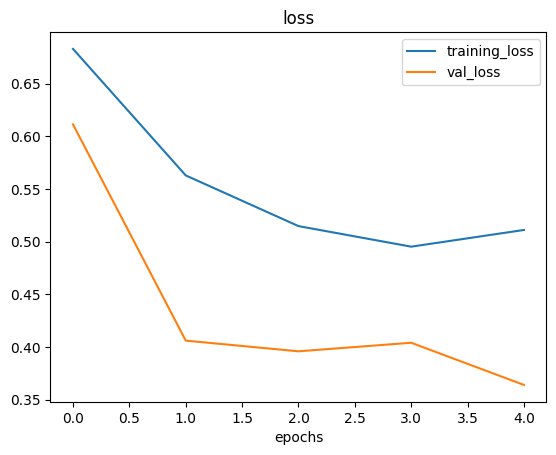

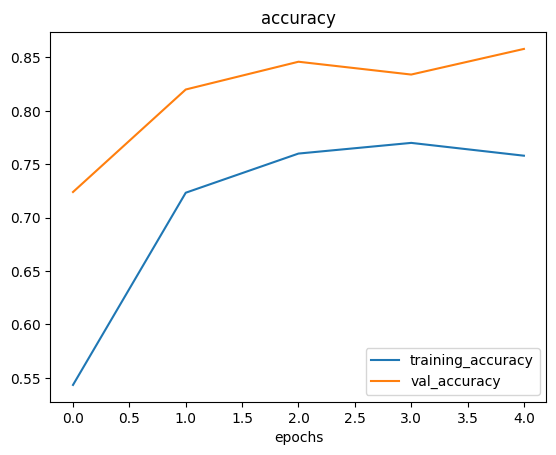

In [59]:
plot_loss_curves(history_7)

In [60]:
print(class_names)

['pizza' 'steak']


In [62]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")

--2024-02-09 14:15:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2024-02-09 14:15:20 (31.7 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

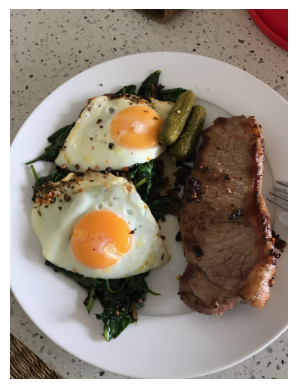

In [64]:
import matplotlib.pyplot as plt
plt.imshow(steak)
plt.axis(False)

In [66]:
expanded_steak = tf.expand_dims(steak, axis=0)

In [70]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img)

  img = tf.image.resize(img, size=[img_shape, img_shape])

  img = img/255.

  return img

In [71]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [74]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 56ms/step


array([[0.85068893]], dtype=float32)

In [75]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [76]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [77]:
def pred_and_plot(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 48ms/step


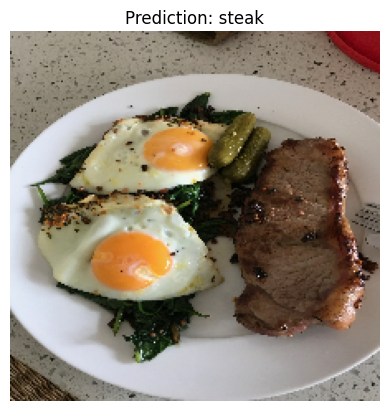

In [78]:
pred_and_plot(model_7, "03-steak.jpeg")

--2024-02-09 14:43:03--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2024-02-09 14:43:03 (40.9 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 132ms/step


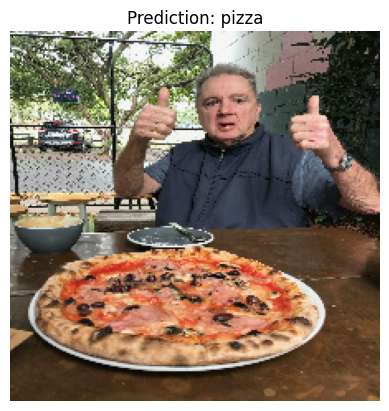

In [79]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

In [82]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-02-09 15:30:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.123.207, 142.250.98.207, 74.125.134.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.123.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  52.5MB/s    in 6.5s    

2024-02-09 15:30:38 (76.3 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [83]:
import os
for dirpath, dirnames, filenmes in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 250 images in '10_food_classes_all_data'.
There are 10 directories and 250 images in '10_food_classes_all_data/train'.
There are 0 directories and 250 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/train/chicken_win

In [84]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [85]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2304021.jpg']
Image shape: (384, 512, 3)


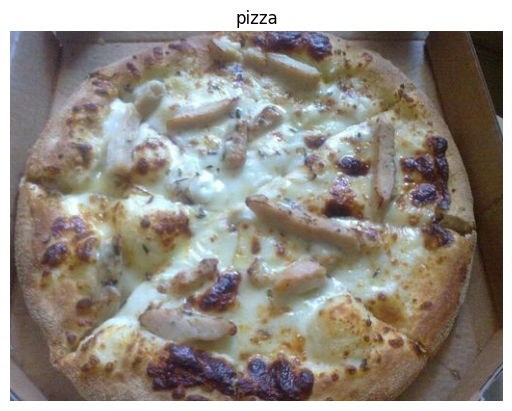

In [88]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [90]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical",
                                               )

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical"
                                             )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [91]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation

model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_8.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [92]:
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 539s 2s/step - loss: 2.1700 - accuracy: 0.1981 - val_loss: 2.0205 - val_accuracy: 0.2712
Epoch 2/5
235/235 [==============================] - 536s 2s/step - loss: 1.8924 - accuracy: 0.3409 - val_loss: 1.8861 - val_accuracy: 0.3468
Epoch 3/5
235/235 [==============================] - 536s 2s/step - loss: 1.5704 - accuracy: 0.4671 - val_loss: 2.0085 - val_accuracy: 0.3208
Epoch 4/5
235/235 [==============================] - 521s 2s/step - loss: 0.9986 - accuracy: 0.6719 - val_loss: 2.5090 - val_accuracy: 0.2928
Epoch 5/5
235/235 [==============================] - 522s 2s/step - loss: 0.3416 - accuracy: 0.8953 - val_loss: 3.7036 - val_accuracy: 0.2724


In [93]:
model_8.evaluate(test_data)

79/79 [==============================] - 55s 684ms/step - loss: 3.7036 - accuracy: 0.2724


[3.703615665435791, 0.27239999175071716]

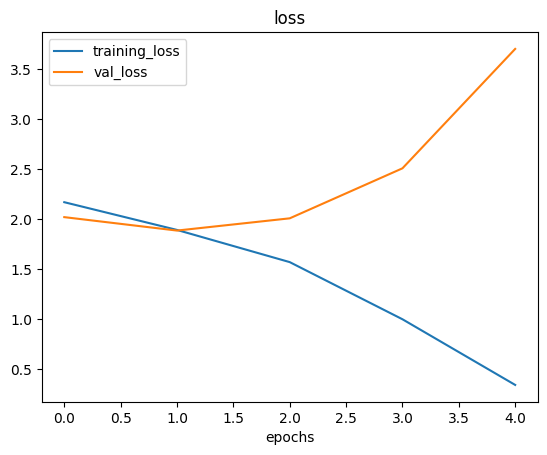

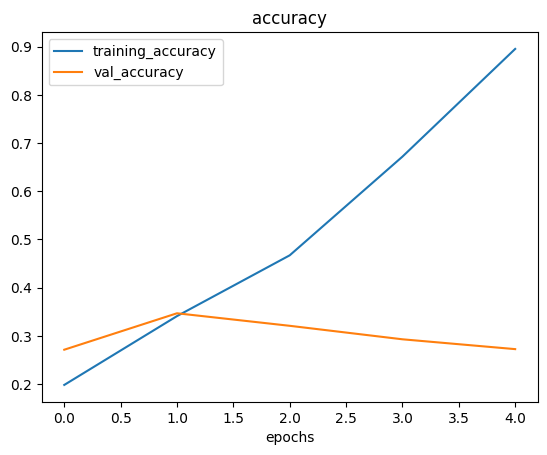

In [94]:
plot_loss_curves(history_8)

In [96]:
model_9 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [98]:
history_9 = model_9.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 261s 1s/step - loss: 2.0903 - accuracy: 0.2575 - val_loss: 1.9682 - val_accuracy: 0.2920
Epoch 2/5
235/235 [==============================] - 249s 1s/step - loss: 1.6992 - accuracy: 0.4265 - val_loss: 1.9490 - val_accuracy: 0.3208
Epoch 3/5
235/235 [==============================] - 245s 1s/step - loss: 1.2151 - accuracy: 0.6117 - val_loss: 2.0426 - val_accuracy: 0.3264
Epoch 4/5
235/235 [==============================] - 237s 1s/step - loss: 0.6861 - accuracy: 0.7968 - val_loss: 2.5117 - val_accuracy: 0.3088
Epoch 5/5
235/235 [==============================] - 243s 1s/step - loss: 0.3245 - accuracy: 0.9196 - val_loss: 2.9896 - val_accuracy: 0.3044


In [99]:
model_9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 29160)             0         
                                                                 
 dense_14 (Dense)            (None, 10)               

In [100]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_20 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_22 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [101]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [102]:
model_10 = tf.keras.models.clone_model(model_8)

model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 641s 3s/step - loss: 2.2892 - accuracy: 0.1424 - val_loss: 2.1861 - val_accuracy: 0.1984
Epoch 2/5
235/235 [==============================] - 583s 2s/step - loss: 2.1705 - accuracy: 0.1987 - val_loss: 2.0555 - val_accuracy: 0.2512
Epoch 3/5
235/235 [==============================] - 612s 3s/step - loss: 2.0942 - accuracy: 0.2495 - val_loss: 1.9422 - val_accuracy: 0.3124
Epoch 4/5
235/235 [==============================] - 611s 3s/step - loss: 2.0252 - accuracy: 0.2871 - val_loss: 1.8733 - val_accuracy: 0.3588
Epoch 5/5
235/235 [==============================] - 581s 2s/step - loss: 1.9931 - accuracy: 0.3052 - val_loss: 1.8674 - val_accuracy: 0.3720


In [103]:
model_10.evaluate(test_data)

79/79 [==============================] - 53s 662ms/step - loss: 1.8674 - accuracy: 0.3720


[1.867401123046875, 0.3720000088214874]

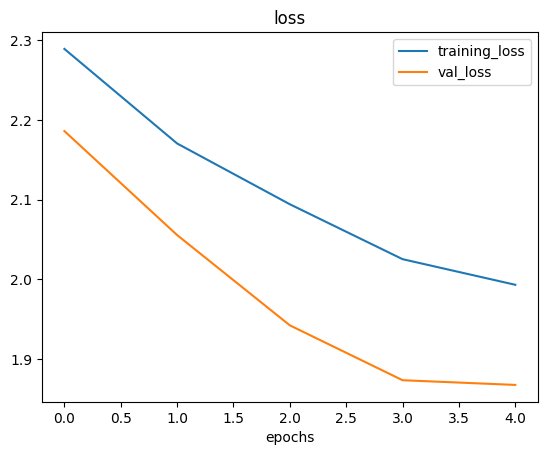

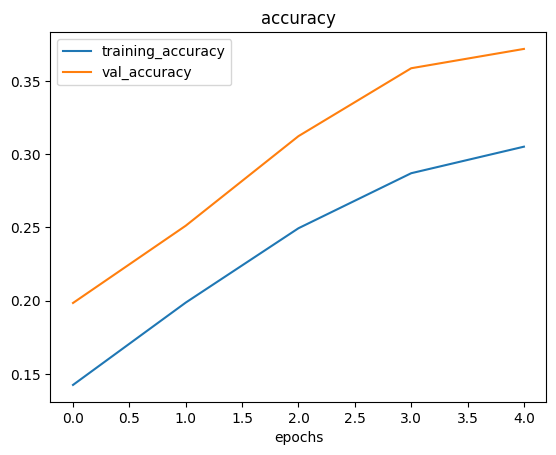

In [104]:
plot_loss_curves(history_10)

In [105]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [106]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg?raw=true
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg?raw=true
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg?raw=true
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg?raw=true

--2024-02-09 18:38:35--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-hamburger.jpeg [following]
--2024-02-09 18:38:35--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-hamburger.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg [following]
--2024-02-09 18:38:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.gi

In [110]:
def pred_and_plot(model, filename, class_names=class_names):

  img = load_and_prep_image(filename)

  pred= model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction:  {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 39ms/step


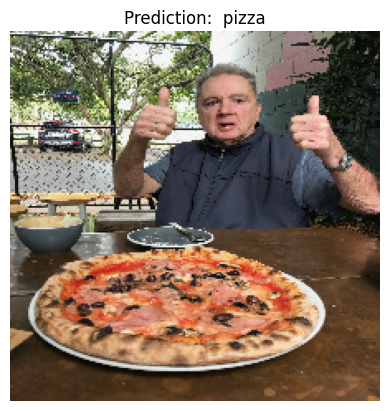

In [111]:
pred_and_plot(model=model_10,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 42ms/step


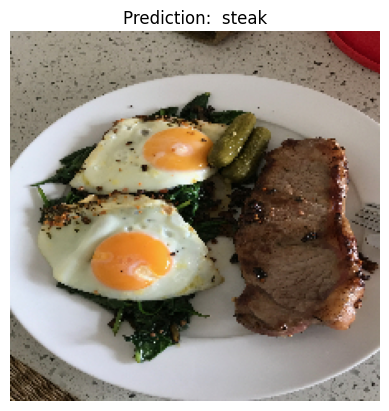

In [112]:
pred_and_plot(model=model_10,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 36ms/step


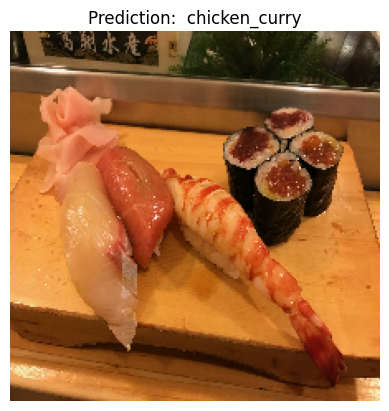

In [115]:
pred_and_plot(model=model_10,
              filename="/content/03-sushi.jpeg?raw=true",
              class_names=class_names)

1/1 [==============================] - 0s 39ms/step


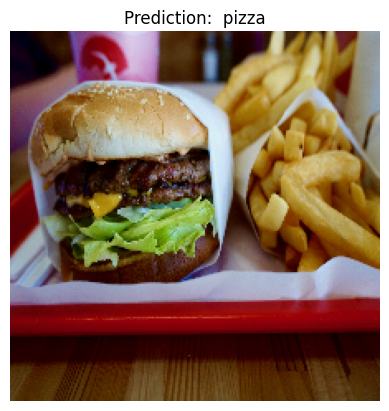

In [116]:
pred_and_plot(model=model_10,
              filename="/content/03-hamburger.jpeg?raw=true",
              class_names=class_names)

In [117]:
model_10.save("saved_trained_model_10")

In [118]:
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 53s 673ms/step - loss: 1.8674 - accuracy: 0.3720


[1.867401361465454, 0.3720000088214874]